In [1]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

In [2]:
%matplotlib inline

In [3]:
catalog = np.loadtxt("/Users/tktakaro/Documents/Type1ax_HST/curtis_files/sn2010ae/sn2010ae.phot")

In [4]:
asci = open("/Users/tktakaro/Documents/Type1ax_HST/machine_learning/sn2010ae_set.reg", "r+")

def mysplit(s, delim=None):
    return [x for x in s.split(delim) if x]

text = asci.readlines()
regionX = np.zeros(871)
regionY = np.zeros(871)
key = []
for i in range(871):
    A = mysplit(text[i+3], ' # ')
    regionX[i] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
    regionY[i] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
    if A[1][-3] == 'l':
        key.append('green')
    elif A[1][-3] == 'u':
        key.append('blue')
    else:
        print("Error: neither blue nor green")

In [5]:
# Creates a array with a space for each object in the catalog, to contain only X,Y positions
positions = np.zeros([np.shape(catalog)[0], 2])
allinfo = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks for a S/N ratio of 50 or greater (to be lowered later)
    if ((catalog[i][5] >= 50)&(abs(catalog[i][6]) < .25)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .1)&(catalog[i][10] == 1)):
        positions[j][0] = catalog[i][2] # Assigns X position with offset
        positions[j][1] = catalog[i][3] # Assigns Y position with offset
        allinfo[j] = catalog[i]
        j = j + 1

# Trims all zeros from end of positions array, left from objects with low S/N
pos = positions[~np.all(positions == 0, axis=1)]
info = allinfo[~np.all(allinfo == 0, axis=1)]

In [6]:
# Adding in colors (Deprecated)
# F435W counts: 11, F555W counts: 24, F625W counts: 37, F814W counts: 50
"""
color1 = np.zeros(info.shape[0])
color2 = np.zeros(info.shape[0])
color3 = np.zeros(info.shape[0])
color4 = np.zeros(info.shape[0])
color5 = np.zeros(info.shape[0])
color6 = np.zeros(info.shape[0])
for i in range(info.shape[0]):
    color1[i] = info[i][50] - info[i][37]
    color2[i] = info[i][50] - info[i][24]
    color3[i] = info[i][50] - info[i][11]
    color4[i] = info[i][37] - info[i][24]
    color5[i] = info[i][37] - info[i][11]
    color6[i] = info[i][24] - info[i][11]   
"""

'\ncolor1 = np.zeros(info.shape[0])\ncolor2 = np.zeros(info.shape[0])\ncolor3 = np.zeros(info.shape[0])\ncolor4 = np.zeros(info.shape[0])\ncolor5 = np.zeros(info.shape[0])\ncolor6 = np.zeros(info.shape[0])\nfor i in range(info.shape[0]):\n    color1[i] = info[i][50] - info[i][37]\n    color2[i] = info[i][50] - info[i][24]\n    color3[i] = info[i][50] - info[i][11]\n    color4[i] = info[i][37] - info[i][24]\n    color5[i] = info[i][37] - info[i][11]\n    color6[i] = info[i][24] - info[i][11]   \n'

In [7]:
for i in range(pos.shape[0]):
    if (pos[i][0] > 3200) & (pos[i][0] < 3300) & (pos[i][1] > 800) & (pos[i][1] < 900):
        print(i)

pos[317] = np.zeros(2)
info[317] = np.zeros(271)
pos = pos[~np.all(pos == 0, axis=1)]
info = info[~np.all(info == 0, axis=1)]
print(pos.shape)
print(info.shape)

317
(871, 2)
(871, 271)


In [8]:
dataset = pandas.DataFrame(info)
#dataset[271] = color1
#dataset[272] = color2
#dataset[273] = color3
#dataset[274] = color4
#dataset[275] = color5
#dataset[276] = color6
dataset[271] = key

In [9]:
array = dataset.values
X = array[:,0:271]
Y = array[:,271]
validation_size = 0.20
seed = 7

In [10]:
flat = X.flatten()
for i in range(flat.size):
    if (np.isnan(flat[i])) or (not np.isfinite(flat[i])):
        print(i//271)
        print(i%271)

379
42
379
224


In [11]:
# Replaces values which were previously NaN
X[379][224] = 99.999
X[379][42] = 99.999
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
                                                    test_size=validation_size, random_state=seed)

In [12]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [13]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.872381 (0.053657)


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn

LDA: 0.832029 (0.036207)
KNN: 0.902422 (0.027452)
CART: 0.870559 (0.042297)
NB: 0.846439 (0.058901)
SVM: 0.817847 (0.072044)


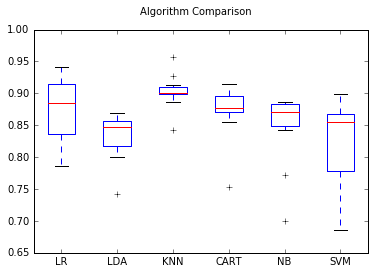

In [14]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.914285714286
[[  7  13]
 [  2 153]]
             precision    recall  f1-score   support

       blue       0.78      0.35      0.48        20
      green       0.92      0.99      0.95       155

avg / total       0.91      0.91      0.90       175



## Now apply algorithm to catalog at large

In [31]:
# Removes points with nan. It is assumed that these are all magnitude measurements, so they are set to their max.
flat = catalog.flatten()
for i in range(flat.size):
    if (np.isnan(flat[i])) or (not np.isfinite(flat[i])):
        catalog[i//271][i%271] = 99.999
        print(i)

111397
111423
111436
111488
111592
111644
187845
188040
190826
191021
203563
203745
207873
207899
207912
207925
208029
208081
216300
216495
231179
231205
231218
231231
231335
231387
241232
241427
255053
255248
256137
256358
302723
302749
302762
302814
302918
302970
303291
303512
304620
304646
304659
304685
304789
304841
318467
318688
342586
342781
440688
440883
460742
460924
466975
467196
489468
489650
494346
494541
496759
496785
496798
496811
496915
496967
509251
509433
517110
517331
537164
537346
570226
570421
588654
588875
593532
593740
594616
594798
606811
607019
609250
609445
634724
634906
637705
637913
637950
637976
637989
638028
638132
638184
639060
639242
639268
655565
655591
655604
655656
655760
655812
655862
656057
659656
659838
664263
664445
679955
679981
679994
680007
680033
680111
680137
680163
680189
685130
685338
692718
692913
692989
693210
700577
700759
704100
704321
714127
714309
727109
727135
727148
727200
727304
727356
729277
729303
729316
729342
729368
729446
729498

In [32]:
cat_predictions=knn.predict(catalog) # Contains the predicted good/bad points 

In [33]:
pos = np.zeros((catalog.shape[0],2))
allinfo = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks to make sure point is "good"
    # Good defined by: 1. S/N > 20     2. Sharpness < .25     3. Roundness < 1     4. Crowding < .1 
    #                  5. Object type = "Bright Star"     6. ML algorithm picks as good
    if ((catalog[i][5] >= 20)&(abs(catalog[i][6]) < .25)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .1)&(catalog[i][10] == 1)&(cat_predictions[i] == 'green')):
        pos[j][0] = catalog[i][2] # Assigns X position with offset
        pos[j][1] = catalog[i][3] # Assigns Y position with offset
        allinfo[j] = catalog[i]
        j = j + 1
                
# Trims all zeros from end of positions array, left from objects with low S/N
pos = pos[~np.all(pos == 0, axis=1)]
info = allinfo[~np.all(allinfo == 0, axis=1)]

# Saves high S/N object X,Y positions
np.savetxt("sn2010ae_ML1.reg", pos, '%5.2f')

## Below is leftover junk

In [65]:
print(info.shape)
print(info[45][15])
print(info[45][28])
print(info[45][41])
print(info[45][54])

(2656, 271)
25.099
23.694
22.633
20.954


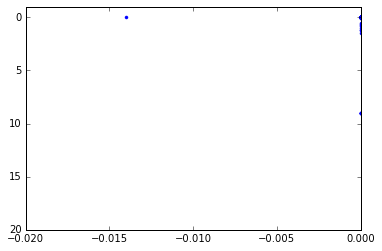

In [87]:
F45 = np.zeros(info.shape[0])
F68 = np.zeros(info.shape[0])

for i in range(info.shape[0]):
    F45[i] = info[i][15] - info[i][28]
    F68[i] = info[i][41] - info[i][54]

#plt.plot(F68, F45, 'b.')
#plt.axis([-1,3, -1,6])
plt.plot(info[:][6], info[:][28], 'b.')
plt.axis([-.02,0,-1,20])
plt.gca().invert_yaxis()

## Re-train, this time with lower signal to noise (old)

In [ ]:
asci = open("/Users/tktakaro/Documents/Type1ax_HST/machine_learning/sn2010ae_set2.reg", "r+")

def mysplit(s, delim=None):
    return [x for x in s.split(delim) if x]

text = asci.readlines()
regionX = np.zeros(2676)
regionY = np.zeros(2676)
info2 = np.zeros([2676,271])
key = []

j = 0
for i in range(2679):
    A = mysplit(text[i+3], ' # ')
    if A[1][-3] != 'l':
        regionX[j] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        regionY[j] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
        info2[j] = info[i+3]
        j = j + 1
    if A[1][-3] == 'u':
        key.append('blue')
    elif A[1][-3] == 'o':
        key.append('yellow')
    elif A[1][-3] == 'e':
        key.append('red')

info2 = info2[~np.all(info2 == 0, axis=1)]

In [ ]:
dataset = pandas.DataFrame(info2)
dataset[271] = key


array = dataset.values
X = array[:,0:271]
Y = array[:,271]
validation_size = 0.20
seed = 5

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
                                                    test_size=validation_size, random_state=seed)

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

## Re-train, this time with lower signal to noise (new)

In [118]:
asci = open("/Users/tktakaro/Documents/Type1ax_HST/machine_learning/Working_SN20_ML1(2_Colors).reg", "r+")

def mysplit(s, delim=None):
    return [x for x in s.split(delim) if x]

text = asci.readlines()
regionX = np.zeros(2656)
regionY = np.zeros(2656)
info2 = np.zeros([2656,271])
key = []

j = 0
for i in range(2653):
    A = mysplit(text[i+3], ' # ')
    if A[1][-3] != 'l':
        regionX[j] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        regionY[j] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
        info2[j] = info[i+3]
        j = j + 1
    if A[1][-3] == 'u':
        key.append('blue')
    elif A[1][-3] == 'o':
        key.append('yellow')
    elif A[1][-3] == 'e':
        key.append('red')

info2 = info2[~np.all(info2 == 0, axis=1)]

In [119]:
dataset = pandas.DataFrame(info2)
dataset[271] = key

In [120]:
array = dataset.values
X = array[:,0:271]
Y = array[:,271]
validation_size = 0.20
seed = 5

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
                                                    test_size=validation_size, random_state=seed)

In [121]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.689664 (0.067256)


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn

LDA: 0.606387 (0.056700)
KNN: 0.709664 (0.056840)
CART: 0.652605 (0.050051)
NB: 0.511429 (0.114428)
SVM: 0.545714 (0.062935)


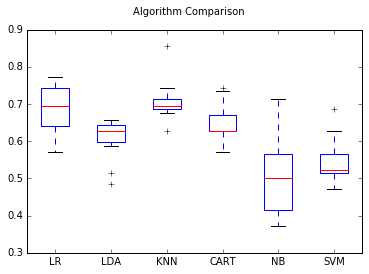

In [125]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [126]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.64367816092
[[31 13]
 [18 25]]
             precision    recall  f1-score   support

       blue       0.63      0.70      0.67        44
     yellow       0.66      0.58      0.62        43

avg / total       0.65      0.64      0.64        87



In [342]:
cat_predictions=knn.predict(catalog) # Contains the predicted good/bad points 

In [350]:
pos = np.zeros((catalog.shape[0],2))
allinfo = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks to make sure point is "good"
    # Good defined by: 1. S/N > 5     2. Sharpness < .25     3. Roundness < 1     4. Crowding < .1 
    #                  5. Object type = "Bright Star"     6. ML algorithm picks as good
    if ((catalog[i][5] >= 10)&(abs(catalog[i][6]) < .25)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .1)&(catalog[i][10] == 1)&(cat_predictions[i] == 'green')):
        pos[j][0] = catalog[i][2] # Assigns X position with offset
        pos[j][1] = catalog[i][3] # Assigns Y position with offset
        allinfo[j] = catalog[i]
        j = j + 1
                
# Trims all zeros from end of positions array, left from objects with low S/N
pos = pos[~np.all(pos == 0, axis=1)]
info = allinfo[~np.all(allinfo == 0, axis=1)]

# Saves high S/N object X,Y positions
np.savetxt("sn2010ae_ML2.reg", pos, '%5.2f')

In [351]:
info.shape

(5034, 271)